<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/ANN-project/blob/main/robot2bactudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.pyplot as plt
import math
import csv
import numpy as np

In [30]:
z=[]
for a in range(0,180,1):
  for b in range(0,180,1):
    x=50*math.cos(math.radians(a))+40*math.cos(math.radians(a+b))
    y=50*math.sin(math.radians(a))+40*math.sin(math.radians(a+b))
    z.append(np.array((a,b,x,y)))

In [31]:
header = ['goc1', 'goc2', 'x', 'y']

with open('data.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(z)


In [40]:
data = pd.read_csv('data.csv')
print(data.shape)
numpy_dataset = data.values
y=numpy_dataset[:,:2]/180.0
x=(numpy_dataset[:,2:]+90.0)/180.0
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)


(32400, 4)


In [41]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))
model.summary() 


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               384       
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 2)                 66        
                                                                 
Total params: 11,842
Trainable params: 11,842
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 64, epochs = 30, validation_split = 0.2)

Epoch 1/30
324/324 [==============================] - 1s 3ms/step - loss: 0.0419 - acc: 0.8229 - val_loss: 0.0031 - val_acc: 0.9298
Epoch 2/30
324/324 [==============================] - 1s 3ms/step - loss: 0.0016 - acc: 0.9558 - val_loss: 9.1280e-04 - val_acc: 0.9680
Epoch 3/30
324/324 [==============================] - 1s 3ms/step - loss: 8.0991e-04 - acc: 0.9666 - val_loss: 6.2436e-04 - val_acc: 0.9693
Epoch 4/30
324/324 [==============================] - 1s 3ms/step - loss: 5.2085e-04 - acc: 0.9735 - val_loss: 4.9826e-04 - val_acc: 0.9730
Epoch 5/30
324/324 [==============================] - 1s 3ms/step - loss: 4.6938e-04 - acc: 0.9750 - val_loss: 4.2496e-04 - val_acc: 0.9720
Epoch 6/30
324/324 [==============================] - 1s 3ms/step - loss: 3.9104e-04 - acc: 0.9752 - val_loss: 2.7727e-04 - val_acc: 0.9823
Epoch 7/30
324/324 [==============================] - 1s 3ms/step - loss: 2.9655e-04 - acc: 0.9806 - val_loss: 2.3836e-04 - val_acc: 0.9813
Epoch 8/30
324/324 [============

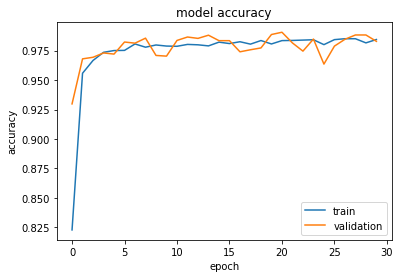

In [43]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()

In [44]:
score = model.evaluate(x_test,y_test,verbose = 0)
print('Sai so kiem tra la:',score[0])
print('Do chinh xac kiem tra', score[1])

Sai so kiem tra la: 0.00012194012379040942
Do chinh xac kiem tra 0.9780864119529724


In [45]:
Px = (40+90)/180
Py = (50+90)/180
test = model.predict([[Px,Py]])
t1 = test[0][0]*180
t2 = test[0][1]*180
x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))
print('x = ',x_1,'y = ',y_1)
print(t1,t2)

x =  40.41590766513066 y =  49.7251931033674
12.270258665084839 89.9134773015976


In [46]:
model.save('Robot2bac.h5')